Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model

Loading the Data

In [2]:

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

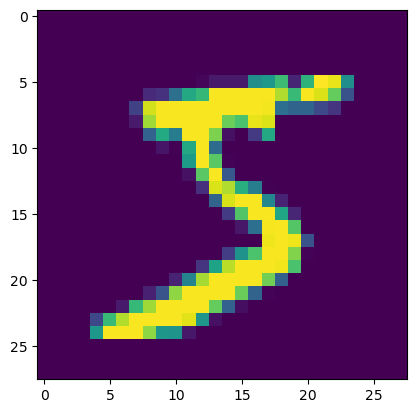

In [6]:
plt.imshow(X_train[0])

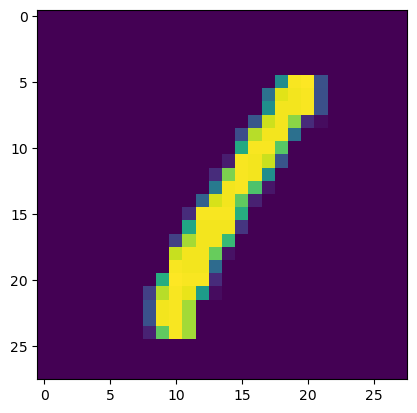

In [7]:
plt.imshow(X_train[3])


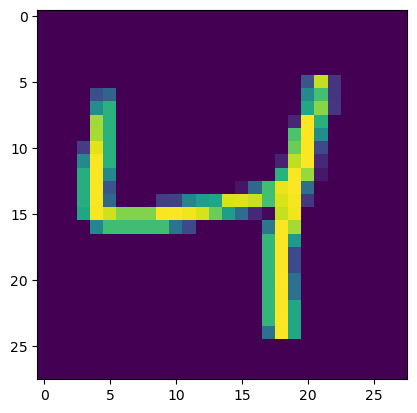

In [8]:
plt.imshow(X_train[2])

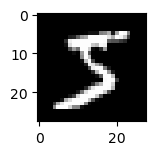

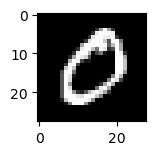

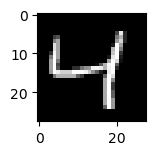

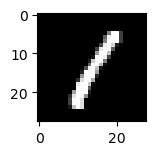

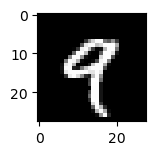

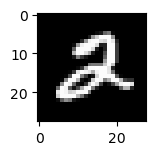

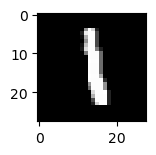

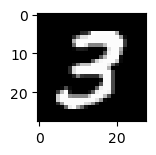

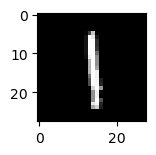

In [9]:
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

Reshaping the data

In [10]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [11]:

X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 


Applying One Hot Encoding

In [13]:

number_of_classes = 20

In [14]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [15]:

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

model creation

In [17]:
model = Sequential()

Add CNN layer


In [18]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
__________________________________________________

Model compilation

In [20]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

Train the model

In [21]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2468 - accuracy: 0.9497 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 2/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0700 - accuracy: 0.9791 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 3/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.0721 - val_accuracy: 0.9781
Epoch 4/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0508 - val_accuracy: 0.9860
Epoch 5/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0748 - val_accuracy: 0.9803
Epoch 6/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0576 - val_accuracy: 0.9846
Epoch 7/20
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.0674 -

Observing the metrics

In [22]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.2057035118341446, 0.9830999970436096]


Test The Model

In [24]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 72ms/step
[[0.00000000e+00 0.00000000e+00 6.06491173e-24 1.90712673e-18
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  4.02277564e-29 1.07236983e-28 6.60379984e-31 2.10526088e-35
  1.21051067e-33 1.70772069e-31 1.56428027e-30 1.87534960e-31
  9.46382788e-33 6.59135976e-33 2.10255244e-31 6.90750514e-32]
 [3.91820406e-33 4.99661963e-21 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.65021779e-33 0.00000000e+00
  1.94918643e-37 0.00000000e+00 3.27558505e-38 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.15650076e-38 3.57618122e-38
  0.00000000e+00 0.00000000e+00 7.38513718e-38 0.00000000e+00]
 [1.04546027e-21 1.00000000e+00 6.00520718e-12 3.58952442e-21
  2.42004840e-18 3.40573684e-20 6.63435507e-15 9.48896177e-16
  2.08975415e-09 1.26908223e-20 3.17872488e-20 3.21045638e-21
  6.38302603e-21 6.47802781e-22 1.19029295e-20 4.51429336e-21
  6.56547449e-22 9.85012328e-21 4.81448876e-20 4.44154085e-22]
 [1.00000000e+0

In [25]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Observing The Metrics

In [26]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 2s 6ms/step - loss: 0.2057 - accuracy: 0.9831
Metrics(Test Loss & Test Accuracy):
[0.2057035118341446, 0.9830999970436096]


Test The Model

In [27]:
prediction = model.predict(X_test[1:5])
print(prediction)


1/1 [==============================] - 0s 22ms/step
[[3.91820406e-33 4.99661963e-21 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.65021779e-33 0.00000000e+00
  1.94918643e-37 0.00000000e+00 3.27558505e-38 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.15650076e-38 3.57618122e-38
  0.00000000e+00 0.00000000e+00 7.38513718e-38 0.00000000e+00]
 [1.04546027e-21 1.00000000e+00 6.00520718e-12 3.58952442e-21
  2.42004840e-18 3.40573684e-20 6.63435507e-15 9.48896177e-16
  2.08975415e-09 1.26908223e-20 3.17872488e-20 3.21045638e-21
  6.38302603e-21 6.47802781e-22 1.19029295e-20 4.51429336e-21
  6.56547449e-22 9.85012328e-21 4.81448876e-20 4.44154085e-22]
 [1.00000000e+00 0.00000000e+00 6.20324297e-32 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.37007936e-38 0.00000000e+00
  3.71513130e-34 6.44171613e-26 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.19415782e-3

In [28]:
print(np.argmax(prediction,axis = 1))
print(y_test[1:5])

[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]



Save The Model

In [29]:
model.save("MNIST.h5")